# Project 2: Clustering
## Akhil Avula, Berkin Durmus, Vivek Krishnamurthy, Meet Taraviya 
ECE 219 Winter 2020 \\
Prof.  Vwani Roychowdhury \\
UCLA, Department of ECE

# Dataset: "Fashion MNIST"

In [0]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
X = np.vstack([x_train, x_test])
X = X.reshape((-1, 784))
Y = np.concatenate([y_train, y_test])

# Question 1

In [0]:
X = X.reshape((-1,784))
print(X.shape)

(70000, 784)


# Question 2

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, max_iter=50, n_init=5,random_state=0)
Z = kmeans.fit_predict(X)

# Question 3

Homogeneity                : 0.504
Completeness               : 0.521
V-measure                  : 0.512
Adjusted mutual info score : 0.512
Adjusted Rand Index        : 0.374


[0.5041629426783741,
 0.5206517560249659,
 0.512274700509922,
 0.5121501017879276,
 0.3741260238856127]

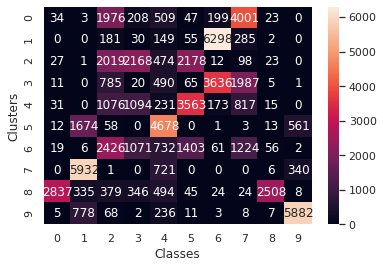

In [0]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
import sklearn.metrics as metrics
import seaborn as sns; sns.set()


def analyze(Y, Z):

  print("Homogeneity                : {:.3f}".format(homogeneity_score(Y, Z)))
  print("Completeness               : {:.3f}".format(completeness_score(Y, Z)))
  print("V-measure                  : {:.3f}".format(v_measure_score(Y, Z)))
  print("Adjusted mutual info score : {:.3f}".format(adjusted_mutual_info_score(Y, Z)))
  print("Adjusted Rand Index        : {:.3f}".format(adjusted_rand_score(Y, Z)))
  cont_mat = contingency_matrix(Y, Z)
  ax = sns.heatmap(cont_mat, annot=True, fmt='d')
  plt.xlabel('Classes')
  plt.ylabel('Clusters')
  return [homogeneity_score(Y, Z), completeness_score(Y, Z), v_measure_score(Y, Z), adjusted_mutual_info_score(Y, Z), adjusted_rand_score(Y, Z)]

analyze(Y, Z)


# Question 4

Since there are only $784$ features, we will vary $r$ from $1$ to $100$.

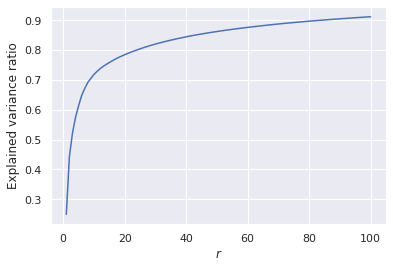

In [0]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

reducer_svd = TruncatedSVD(n_components=100)
reducer_svd.fit(X)

plt.xlabel("$r$")
plt.ylabel("Explained variance ratio")

plt.plot(np.arange(1,101), np.cumsum(reducer_svd.explained_variance_ratio_))
plt.show()

# Question 5

Number of components       : 1
Homogeneity                : 0.163
Completeness               : 0.165
V-measure                  : 0.164
Adjusted mutual info score : 0.164
Adjusted Rand Index        : 0.081


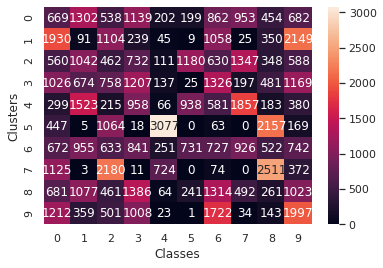


Number of components       : 2
Homogeneity                : 0.404
Completeness               : 0.410
V-measure                  : 0.407
Adjusted mutual info score : 0.407
Adjusted Rand Index        : 0.252


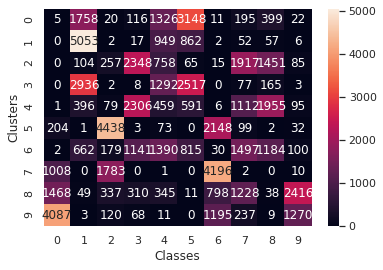


Number of components       : 3
Homogeneity                : 0.463
Completeness               : 0.474
V-measure                  : 0.468
Adjusted mutual info score : 0.468
Adjusted Rand Index        : 0.305


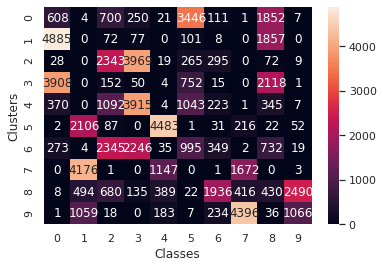


Number of components       : 5
Homogeneity                : 0.487
Completeness               : 0.503
V-measure                  : 0.495
Adjusted mutual info score : 0.495
Adjusted Rand Index        : 0.335


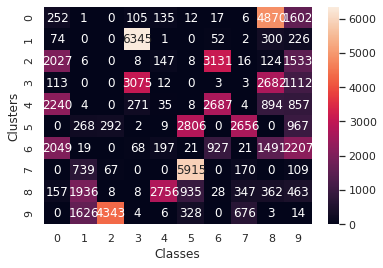


Number of components       : 10
Homogeneity                : 0.555
Completeness               : 0.590
V-measure                  : 0.572
Adjusted mutual info score : 0.572
Adjusted Rand Index        : 0.394


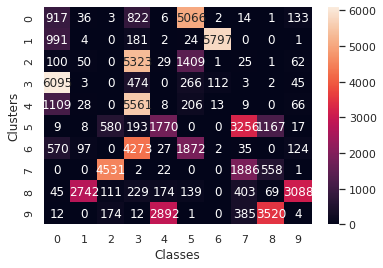


Number of components       : 20
Homogeneity                : 0.487
Completeness               : 0.517
V-measure                  : 0.502
Adjusted mutual info score : 0.502
Adjusted Rand Index        : 0.308


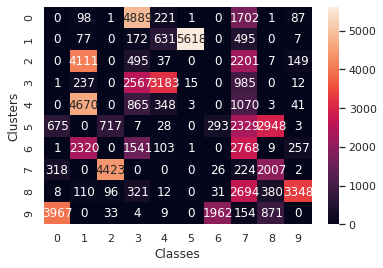


Number of components       : 50
Homogeneity                : 0.481
Completeness               : 0.500
V-measure                  : 0.491
Adjusted mutual info score : 0.490
Adjusted Rand Index        : 0.304


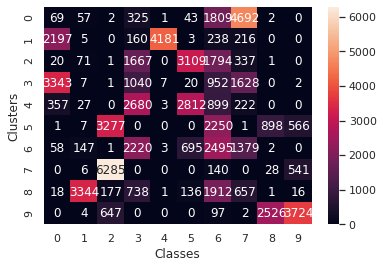


Number of components       : 100
Homogeneity                : 0.484
Completeness               : 0.508
V-measure                  : 0.496
Adjusted mutual info score : 0.496
Adjusted Rand Index        : 0.317


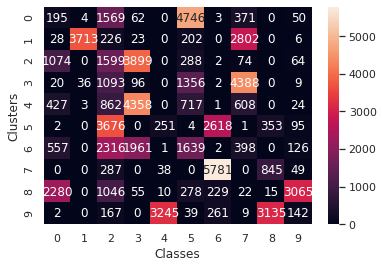

KeyboardInterrupt: ignored

In [0]:
from sklearn.decomposition import NMF
number_of_components = [1, 2, 3, 5, 10, 20, 50, 100]
nmf_scores = []
for n in number_of_components:
  nmf = NMF(n_components=n)
  W = nmf.fit_transform(X)
  kmeans = KMeans(n_clusters=10, max_iter=50, n_init=5)
  Z = kmeans.fit_predict(W)
  plt.clf()
  print("Number of components       :", n)
  nmf_scores.append(analyze(Y, Z))
  plt.show()
  print()

nmf_scores = np.array(nmf_scores)


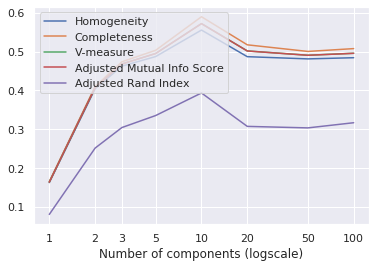

In [0]:
plt.clf()
plt.xscale('log')
plt.xticks(number_of_components, number_of_components)
plt.xlabel("Number of components (logscale)")
plt.plot(number_of_components, nmf_scores[:,0])
plt.plot(number_of_components, nmf_scores[:,1])
plt.plot(number_of_components, nmf_scores[:,2])
plt.plot(number_of_components, nmf_scores[:,3])
plt.plot(number_of_components, nmf_scores[:,4])
plt.legend(['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Mutual Info Score', 'Adjusted Rand Index'], loc='upper left')

plt.show()

Number of components       : 1
Homogeneity                : 0.163
Completeness               : 0.165
V-measure                  : 0.164
Adjusted mutual info score : 0.164
Adjusted Rand Index        : 0.082


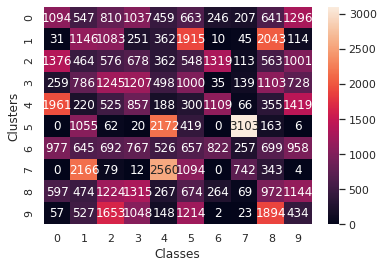


Number of components       : 2
Homogeneity                : 0.403
Completeness               : 0.407
V-measure                  : 0.405
Adjusted mutual info score : 0.405
Adjusted Rand Index        : 0.253


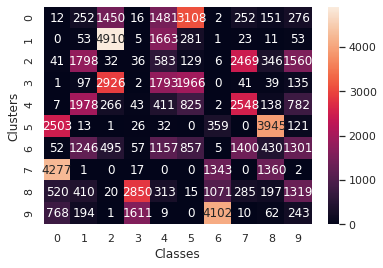


Number of components       : 3
Homogeneity                : 0.440
Completeness               : 0.443
V-measure                  : 0.441
Adjusted mutual info score : 0.441
Adjusted Rand Index        : 0.279


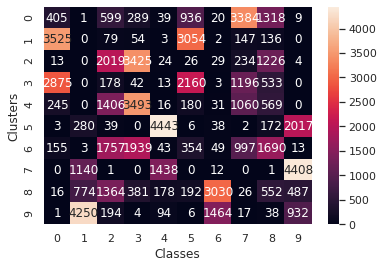


Number of components       : 5
Homogeneity                : 0.482
Completeness               : 0.493
V-measure                  : 0.487
Adjusted mutual info score : 0.487
Adjusted Rand Index        : 0.335


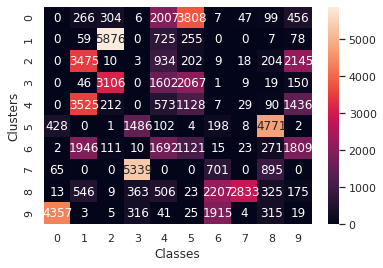


Number of components       : 10
Homogeneity                : 0.498
Completeness               : 0.521
V-measure                  : 0.509
Adjusted mutual info score : 0.509
Adjusted Rand Index        : 0.346


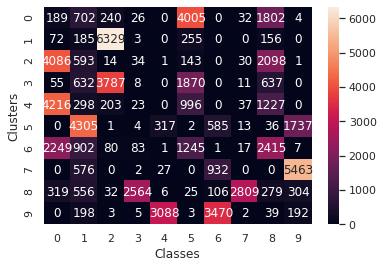


Number of components       : 20
Homogeneity                : 0.499
Completeness               : 0.522
V-measure                  : 0.510
Adjusted mutual info score : 0.510
Adjusted Rand Index        : 0.347


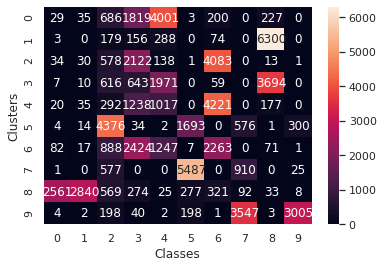


Number of components       : 50
Homogeneity                : 0.500
Completeness               : 0.523
V-measure                  : 0.511
Adjusted mutual info score : 0.511
Adjusted Rand Index        : 0.347


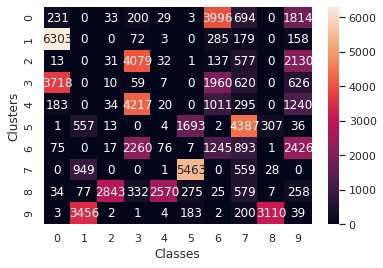


Number of components       : 100
Homogeneity                : 0.500
Completeness               : 0.523
V-measure                  : 0.511
Adjusted mutual info score : 0.511
Adjusted Rand Index        : 0.347


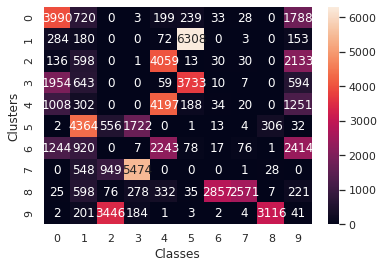

In [0]:
from sklearn.decomposition import TruncatedSVD
number_of_components = [1, 2, 3, 5, 10, 20, 50, 100]
svd_scores = []
for n in number_of_components:
  svd = TruncatedSVD(n_components=n)
  W = svd.fit_transform(X)
  kmeans = KMeans(n_clusters=10, max_iter=50, n_init=30)
  Z = kmeans.fit_predict(W)
  print("Number of components       :", n)
  plt.clf()
  svd_scores.append(analyze(Y, Z))
  plt.show()
  print()

svd_scores = np.array(svd_scores)


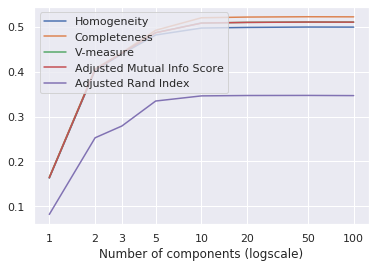

In [0]:
plt.clf()
plt.xscale('log')
plt.xticks(number_of_components, number_of_components)
plt.xlabel("Number of components (logscale)")
plt.plot(number_of_components, svd_scores[:,0])
plt.plot(number_of_components, svd_scores[:,1])
plt.plot(number_of_components, svd_scores[:,2])
plt.plot(number_of_components, svd_scores[:,3])
plt.plot(number_of_components, svd_scores[:,4])
plt.legend(['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Mutual Info Score', 'Adjusted Rand Index'], loc='upper left')

plt.show()

# Question 6

As $r$ increases, number of dimensions for K-means's input increases. Initially, the amount of information captured in these features increases and hence K-mean's performance increases. In higher dimensions, Euclidean distance is not a good metric to use, because distances between pairs of points do not vary much relatively. Hence, inter-cluster and intra-cluster distances are of same order of magnitude, making the data behave like uniformly randomly generated samples. Hence meaningful clusters cannot be found.

# Question 7

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# colours = np.array([[1.,0.,0.,0.1],[0.,1.,1.,0.1]])
colours = np.random.uniform(0.0, 1.0, size=(10,4))
colours[:,3] = 0.05

# mms_vis = MinMaxScaler()
# pca_vis = PCA(n_components=2)
# X_pca = pca_vis.fit_transform(mms_vis.fit_transform(X))

In [0]:
def visualize(X,Y,Z, name=None):

  # X_pca = pca_vis.fit_transform(X)
  X_pca = X

  plt.clf()
  plt.scatter(X_pca[:,0],X_pca[:,1],c=colours[Y])

  for i in range(10):
    plt.scatter(X_pca[Y==i,0].mean(),X_pca[Y==i,1].mean(),marker='X',color='black')

  plt.xlabel('Data Points')
  plt.title('Known labels and means')
  if name is None:
    plt.show()
  else:
    plt.savefig(name + '_known.png', bbox_inches='tight', dpi=300)


  plt.clf()
  plt.scatter(X_pca[:,0],X_pca[:,1],c=colours[Z])

  for i in range(10):
    plt.scatter(X_pca[Z==i,0].mean(),X_pca[Z==i,1].mean(),marker='X',color='black')
  
  
  plt.xlabel('Data Points')
  plt.title('Predicted labels and means')
  if name is None:
    plt.show()
  else:
    plt.savefig(name + '_predicted.png', bbox_inches='tight', dpi=300)

In [0]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
r=10
reducer_svd = TruncatedSVD(n_components=r)
X_reduced=reducer_svd.fit_transform(X)
kmeans = KMeans(n_clusters=10)
BLSI_KM=kmeans.fit(X_reduced)
Z = BLSI_KM.labels_

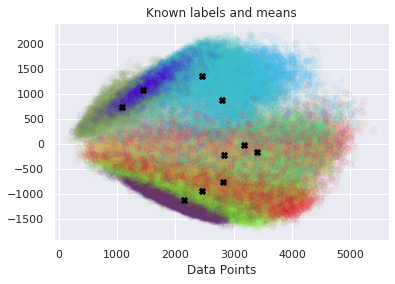

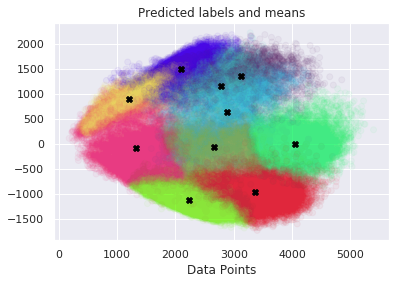

In [0]:
visualize(X_reduced,Y,Z)

In [0]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import numpy as np
r = 10
reducer_nmf = NMF(n_components=r, random_state=None)
X_reduced=reducer_nmf.fit_transform(X)
kmeans = KMeans(n_clusters=10)
BLSI_KM=kmeans.fit(X_reduced)
Z=BLSI_KM.labels_

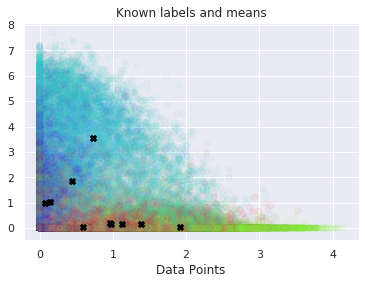

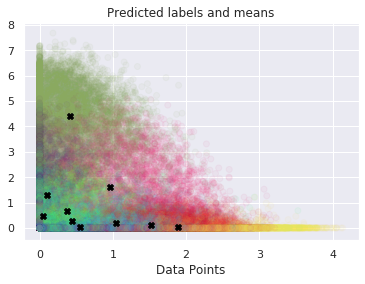

In [0]:
visualize(X_reduced,Y,Z)

# Question 8

TruncatedSVD


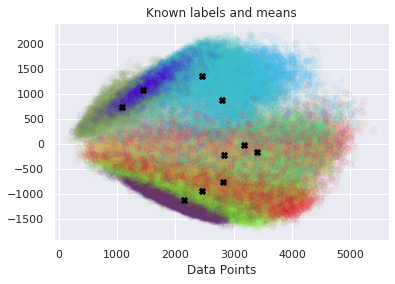

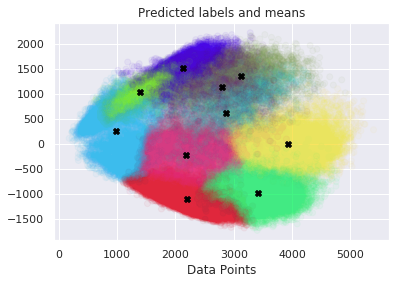

TruncatedSVD + StandardScaler


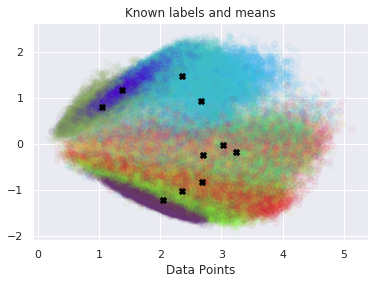

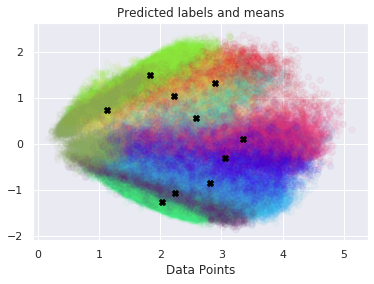

NMF


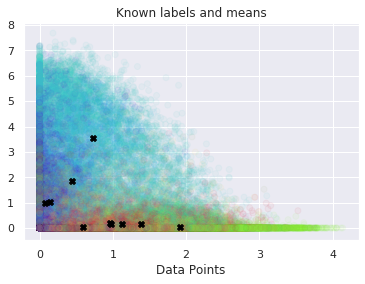

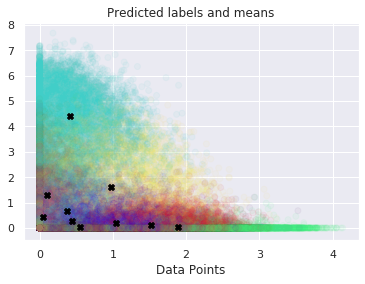

NMF + StandardScaler


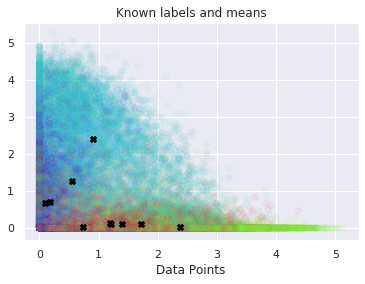

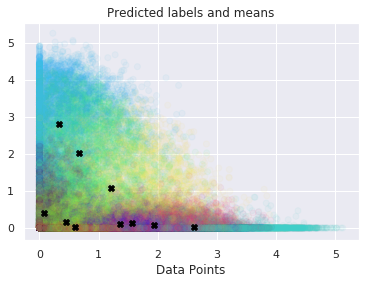

NMF + LogTransform


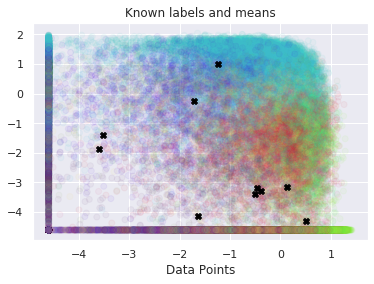

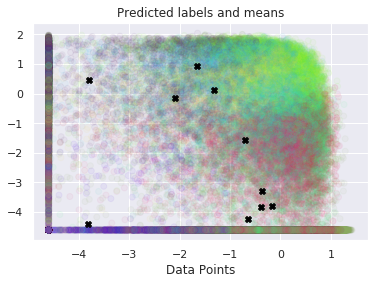

NMF + StandardScaler + LogTransform


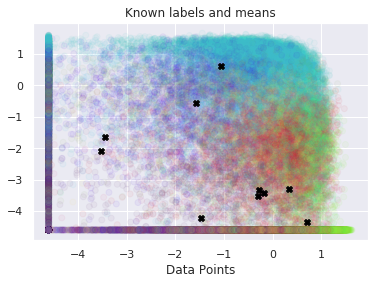

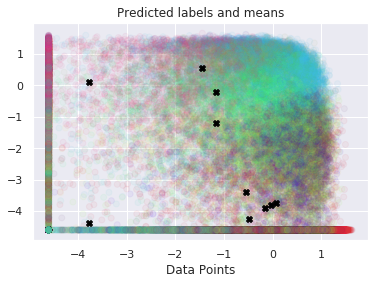

NMF + LogTransform + StandardScaler


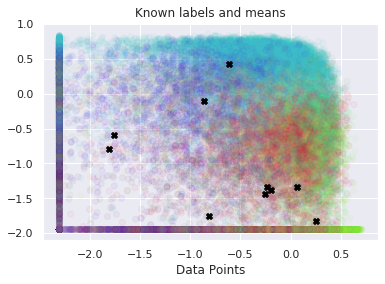

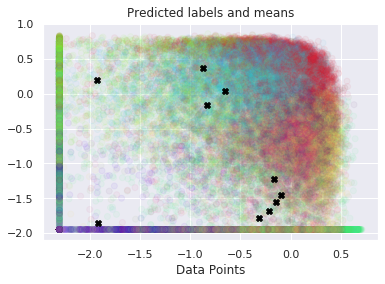

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import numpy as np

def get_fit_transform(X, all_fit_transforms):
  for model in all_fit_transforms:
    X = model.fit_transform(X)
  return X, ' + '.join(list(map(lambda C: type(C).__name__, all_fit_transforms)))

eps = 0.01

class LogTransform:
  def fit_transform(self, X):
    return np.log(X+eps)

all_fit_transform_sets = [
                      [TruncatedSVD(n_components=10)],
                      [TruncatedSVD(n_components=10), StandardScaler(with_mean=False,with_std=True)],
                      [NMF(n_components=10)],
                      [NMF(n_components=10), StandardScaler(with_mean=False,with_std=True)],
                      [NMF(n_components=10), LogTransform()],
                      [NMF(n_components=10), StandardScaler(with_mean=False,with_std=True), LogTransform()],
                      [NMF(n_components=10), LogTransform(), StandardScaler(with_mean=False,with_std=True)],
]

Z_all = []
names = []
X_all = []


for i, all_fit_transform_set in enumerate(all_fit_transform_sets):
  X_processed, name = get_fit_transform(X, all_fit_transform_set)
  

  kmeans = KMeans(n_clusters=10)
  kmeans.fit(X_processed)
  Z = kmeans.labels_
  print(name)
  name = name.replace(' + ', '_')
  names.append(name)
  visualize(X_processed, Y, Z)
  # plt.savefig(name + '.png', bbox_inches='tight', dpi=300)

  Z_all.append(Z)
  X_all.append(X_processed)

# for X_p, Z, name in zip(X_all, Z_all, names):
#   visualize(X_p, Y, Z, name=name)


# Question 9

In [0]:
# code here

# Question 10

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
import sklearn.metrics as metrics
import seaborn as sns; sns.set()

def measure_cluster(Y,Z, caption):
  print(caption)
  print('Homogeneity SCORE :',metrics.homogeneity_score(Y, Z))
  print('Completeness SCORE :',metrics.completeness_score(Y, Z))
  print('V Measure SCORE :',metrics.v_measure_score(Y, Z))
  print('Adjusted Rand SCORE :',metrics.adjusted_rand_score(Y, Z))
  print('Adjusted Mutual Info SCORE :',metrics.adjusted_mutual_info_score(Y, Z))


for Z, name in zip(Z_all, names):
  measure_cluster(Y,Z, name)


TruncatedSVD
Homogeneity SCORE : 0.4975639055935359
Completeness SCORE : 0.5204586349428976
V Measure SCORE : 0.508753825756377
Adjusted Rand SCORE : 0.34613300357353965
Adjusted Mutual Info SCORE : 0.5086275345192669
TruncatedSVD_StandardScaler
Homogeneity SCORE : 0.5524452706255427
Completeness SCORE : 0.5718642194490808
V Measure SCORE : 0.5619870440720792
Adjusted Rand SCORE : 0.4024327540489435
Adjusted Mutual Info SCORE : 0.5618750164665997
NMF
Homogeneity SCORE : 0.5149014839686353
Completeness SCORE : 0.5268510871054081
V Measure SCORE : 0.5208077505417209
Adjusted Rand SCORE : 0.35850421994735354
Adjusted Mutual Info SCORE : 0.5206858924080905
NMF_StandardScaler
Homogeneity SCORE : 0.5421281119169696
Completeness SCORE : 0.5550171155428283
V Measure SCORE : 0.5484969052410364
Adjusted Rand SCORE : 0.383284431154151
Adjusted Mutual Info SCORE : 0.5483820571217989
NMF_LogTransform
Homogeneity SCORE : 0.4856629362370934
Completeness SCORE : 0.5038571831570626
V Measure SCORE : 0.